<a href="https://colab.research.google.com/github/kburns/cism_dedalus_2023/blob/main/lecture_1_intro_to_dedalus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction to Dedalus -- Burgers & KdV Equations

**Overview:** This notebook provides a brief (~30 min) introduction to [Dedalus](http://dedalus-project.org).
It assumes familiarity with linear PDEs and basic numerical methods (e.g. ODE integration) at the undergraduate level.
The tutorial introduces the basic Dedalus v3 API and walks through setting up and solving the 1D Burgers and KdV equations.

**About Dedalus:** [Dedalus](http://dedalus-project.org) is an open-source Python package for solving partial differential equations (PDEs) using global spectral methods.
These methods provide highly accurate numerical solutions for PDEs with smooth solutions in simple domains like boxes and spheres.
Dedalus implements modern parallel algorithms utilizing sparse polynomial bases, but all with an easy-to-use symbolic interface.
The code is being used in a wide range of fields, often for problems involving fluid dynamics.

**Author:** [Keaton Burns](http://keaton-burns.com)

## Setup

In [1]:
# Set environment variables for best performance
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

# Minimize logging output
import logging
logging.disable(logging.DEBUG)

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1


In [2]:
# Check for Dedalus and install if necessary
try:
    import dedalus.public as de
    print("Dedalus already installed")

except:
    print("Dedalus not installed yet. Let's do it.")
    print()

    # Step 1: Install FFTW
    !apt-get install libfftw3-dev
    !apt-get install libfftw3-mpi-dev

    # Step 2: Set paths for Dedalus installation
    import os
    os.environ['MPI_INCLUDE_PATH'] = "/usr/lib/x86_64-linux-gnu/openmpi/include"
    os.environ['MPI_LIBRARY_PATH'] = "/usr/lib/x86_64-linux-gnu"
    os.environ['FFTW_INCLUDE_PATH'] = "/usr/include"
    os.environ['FFTW_LIBRARY_PATH'] = "/usr/lib/x86_64-linux-gnu"

    # Step 3: Install Dedalus using pip
    !pip3 install --no-cache http://github.com/dedalusproject/dedalus/zipball/master/

    # Step 4: Check installation
    print()
    try:
        import dedalus.public as de
        print("Dedalus successfully installed :)")
    except:
        print("Error installing Dedalus :(")
        raise

Dedalus not installed yet. Let's do it.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfftw3-bin libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3 libfftw3-single3
0 upgraded, 5 newly installed, 0 to remove and 24 not upgraded.
Need to get 3,986 kB of archives.
After this operation, 22.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-long3 amd64 3.3.8-2ubuntu1 [313 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-quad3 amd64 3.3.8-2ubuntu1 [673 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-single3 amd64 3.3.8-2ubuntu1 [756 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-bin amd64 3.3.8-2ubuntu1 [32.2 kB]
Get:5 http://archive

# Content

INFO:subsystems:Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.4e+01/s


2023-03-27 20:26:38,741 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.4e+01/s


INFO:__main__:Iteration=100, Time=2.000000e-01, dt=2.000000e-03


2023-03-27 20:26:40,069 __main__ 0/1 INFO :: Iteration=100, Time=2.000000e-01, dt=2.000000e-03


INFO:__main__:Iteration=200, Time=4.000000e-01, dt=2.000000e-03


2023-03-27 20:26:40,179 __main__ 0/1 INFO :: Iteration=200, Time=4.000000e-01, dt=2.000000e-03


INFO:__main__:Iteration=300, Time=6.000000e-01, dt=2.000000e-03


2023-03-27 20:26:40,283 __main__ 0/1 INFO :: Iteration=300, Time=6.000000e-01, dt=2.000000e-03


INFO:__main__:Iteration=400, Time=8.000000e-01, dt=2.000000e-03


2023-03-27 20:26:40,384 __main__ 0/1 INFO :: Iteration=400, Time=8.000000e-01, dt=2.000000e-03


INFO:__main__:Iteration=500, Time=1.000000e+00, dt=2.000000e-03


2023-03-27 20:26:40,486 __main__ 0/1 INFO :: Iteration=500, Time=1.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=600, Time=1.200000e+00, dt=2.000000e-03


2023-03-27 20:26:40,599 __main__ 0/1 INFO :: Iteration=600, Time=1.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=700, Time=1.400000e+00, dt=2.000000e-03


2023-03-27 20:26:40,713 __main__ 0/1 INFO :: Iteration=700, Time=1.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=800, Time=1.600000e+00, dt=2.000000e-03


2023-03-27 20:26:40,834 __main__ 0/1 INFO :: Iteration=800, Time=1.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=900, Time=1.800000e+00, dt=2.000000e-03


2023-03-27 20:26:40,946 __main__ 0/1 INFO :: Iteration=900, Time=1.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1000, Time=2.000000e+00, dt=2.000000e-03


2023-03-27 20:26:41,055 __main__ 0/1 INFO :: Iteration=1000, Time=2.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1100, Time=2.200000e+00, dt=2.000000e-03


2023-03-27 20:26:41,158 __main__ 0/1 INFO :: Iteration=1100, Time=2.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1200, Time=2.400000e+00, dt=2.000000e-03


2023-03-27 20:26:41,260 __main__ 0/1 INFO :: Iteration=1200, Time=2.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1300, Time=2.600000e+00, dt=2.000000e-03


2023-03-27 20:26:41,363 __main__ 0/1 INFO :: Iteration=1300, Time=2.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1400, Time=2.800000e+00, dt=2.000000e-03


2023-03-27 20:26:41,469 __main__ 0/1 INFO :: Iteration=1400, Time=2.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1500, Time=3.000000e+00, dt=2.000000e-03


2023-03-27 20:26:41,585 __main__ 0/1 INFO :: Iteration=1500, Time=3.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1600, Time=3.200000e+00, dt=2.000000e-03


2023-03-27 20:26:41,692 __main__ 0/1 INFO :: Iteration=1600, Time=3.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1700, Time=3.400000e+00, dt=2.000000e-03


2023-03-27 20:26:41,797 __main__ 0/1 INFO :: Iteration=1700, Time=3.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1800, Time=3.600000e+00, dt=2.000000e-03


2023-03-27 20:26:41,903 __main__ 0/1 INFO :: Iteration=1800, Time=3.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=1900, Time=3.800000e+00, dt=2.000000e-03


2023-03-27 20:26:42,022 __main__ 0/1 INFO :: Iteration=1900, Time=3.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2000, Time=4.000000e+00, dt=2.000000e-03


2023-03-27 20:26:42,137 __main__ 0/1 INFO :: Iteration=2000, Time=4.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2100, Time=4.200000e+00, dt=2.000000e-03


2023-03-27 20:26:42,246 __main__ 0/1 INFO :: Iteration=2100, Time=4.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2200, Time=4.400000e+00, dt=2.000000e-03


2023-03-27 20:26:42,344 __main__ 0/1 INFO :: Iteration=2200, Time=4.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2300, Time=4.600000e+00, dt=2.000000e-03


2023-03-27 20:26:42,446 __main__ 0/1 INFO :: Iteration=2300, Time=4.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2400, Time=4.800000e+00, dt=2.000000e-03


2023-03-27 20:26:42,544 __main__ 0/1 INFO :: Iteration=2400, Time=4.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2500, Time=5.000000e+00, dt=2.000000e-03


2023-03-27 20:26:42,655 __main__ 0/1 INFO :: Iteration=2500, Time=5.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2600, Time=5.200000e+00, dt=2.000000e-03


2023-03-27 20:26:42,769 __main__ 0/1 INFO :: Iteration=2600, Time=5.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2700, Time=5.400000e+00, dt=2.000000e-03


2023-03-27 20:26:42,878 __main__ 0/1 INFO :: Iteration=2700, Time=5.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2800, Time=5.600000e+00, dt=2.000000e-03


2023-03-27 20:26:42,980 __main__ 0/1 INFO :: Iteration=2800, Time=5.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=2900, Time=5.800000e+00, dt=2.000000e-03


2023-03-27 20:26:43,091 __main__ 0/1 INFO :: Iteration=2900, Time=5.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3000, Time=6.000000e+00, dt=2.000000e-03


2023-03-27 20:26:43,189 __main__ 0/1 INFO :: Iteration=3000, Time=6.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3100, Time=6.200000e+00, dt=2.000000e-03


2023-03-27 20:26:43,290 __main__ 0/1 INFO :: Iteration=3100, Time=6.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3200, Time=6.400000e+00, dt=2.000000e-03


2023-03-27 20:26:43,400 __main__ 0/1 INFO :: Iteration=3200, Time=6.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3300, Time=6.600000e+00, dt=2.000000e-03


2023-03-27 20:26:43,507 __main__ 0/1 INFO :: Iteration=3300, Time=6.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3400, Time=6.800000e+00, dt=2.000000e-03


2023-03-27 20:26:43,616 __main__ 0/1 INFO :: Iteration=3400, Time=6.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3500, Time=7.000000e+00, dt=2.000000e-03


2023-03-27 20:26:43,723 __main__ 0/1 INFO :: Iteration=3500, Time=7.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3600, Time=7.200000e+00, dt=2.000000e-03


2023-03-27 20:26:43,840 __main__ 0/1 INFO :: Iteration=3600, Time=7.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3700, Time=7.400000e+00, dt=2.000000e-03


2023-03-27 20:26:43,953 __main__ 0/1 INFO :: Iteration=3700, Time=7.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3800, Time=7.600000e+00, dt=2.000000e-03


2023-03-27 20:26:44,064 __main__ 0/1 INFO :: Iteration=3800, Time=7.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=3900, Time=7.800000e+00, dt=2.000000e-03


2023-03-27 20:26:44,172 __main__ 0/1 INFO :: Iteration=3900, Time=7.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4000, Time=8.000000e+00, dt=2.000000e-03


2023-03-27 20:26:44,280 __main__ 0/1 INFO :: Iteration=4000, Time=8.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4100, Time=8.200000e+00, dt=2.000000e-03


2023-03-27 20:26:44,384 __main__ 0/1 INFO :: Iteration=4100, Time=8.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4200, Time=8.400000e+00, dt=2.000000e-03


2023-03-27 20:26:44,490 __main__ 0/1 INFO :: Iteration=4200, Time=8.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4300, Time=8.600000e+00, dt=2.000000e-03


2023-03-27 20:26:44,604 __main__ 0/1 INFO :: Iteration=4300, Time=8.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4400, Time=8.800000e+00, dt=2.000000e-03


2023-03-27 20:26:44,709 __main__ 0/1 INFO :: Iteration=4400, Time=8.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4500, Time=9.000000e+00, dt=2.000000e-03


2023-03-27 20:26:44,803 __main__ 0/1 INFO :: Iteration=4500, Time=9.000000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4600, Time=9.200000e+00, dt=2.000000e-03


2023-03-27 20:26:44,881 __main__ 0/1 INFO :: Iteration=4600, Time=9.200000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4700, Time=9.400000e+00, dt=2.000000e-03


2023-03-27 20:26:44,958 __main__ 0/1 INFO :: Iteration=4700, Time=9.400000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4800, Time=9.600000e+00, dt=2.000000e-03


2023-03-27 20:26:45,032 __main__ 0/1 INFO :: Iteration=4800, Time=9.600000e+00, dt=2.000000e-03


INFO:__main__:Iteration=4900, Time=9.800000e+00, dt=2.000000e-03


2023-03-27 20:26:45,108 __main__ 0/1 INFO :: Iteration=4900, Time=9.800000e+00, dt=2.000000e-03


INFO:__main__:Iteration=5000, Time=1.000000e+01, dt=2.000000e-03


2023-03-27 20:26:45,190 __main__ 0/1 INFO :: Iteration=5000, Time=1.000000e+01, dt=2.000000e-03


INFO:solvers:Simulation stop time reached.


2023-03-27 20:26:45,197 solvers 0/1 INFO :: Simulation stop time reached.


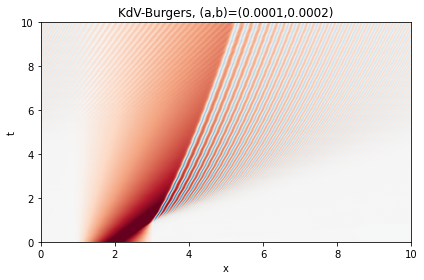

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)

%matplotlib widget


# Parameters
Lx = 10
Nx = 1024
a = 1e-4
b = 2e-4
dealias = 3/2
stop_sim_time = 10
timestepper = d3.SBDF2
timestep = 2e-3
dtype = np.float64

# Bases
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=dtype)
xbasis = d3.RealFourier(xcoord, size=Nx, bounds=(0, Lx), dealias=dealias)

# Fields
u = dist.Field(name='u', bases=xbasis)

# Substitutions
dx = lambda A: d3.Differentiate(A, xcoord)

# Problem
problem = d3.IVP([u], namespace=locals())
problem.add_equation("dt(u) - a*dx(dx(u)) - b*dx(dx(dx(u))) = - u*dx(u)")

# Initial conditions
x = dist.local_grid(xbasis)
n = 20
u['g'] = np.log(1 + np.cosh(n)**2/np.cosh(n*(x-0.2*Lx))**2) / (2*n)

# Solver
solver = problem.build_solver(timestepper)
solver.stop_sim_time = stop_sim_time

# Main loop
u.change_scales(1)
u_list = [np.copy(u['g'])]
t_list = [solver.sim_time]
while solver.proceed:
    solver.step(timestep)
    if solver.iteration % 100 == 0:
        logger.info('Iteration=%i, Time=%e, dt=%e' %(solver.iteration, solver.sim_time, timestep))
    if solver.iteration % 25 == 0:
        u.change_scales(1)
        u_list.append(np.copy(u['g']))
        t_list.append(solver.sim_time)

# Plot
plt.figure(figsize=(6, 4))
plt.pcolormesh(x.ravel(), np.array(t_list), np.array(u_list), cmap='RdBu_r', shading='gouraud', rasterized=True, clim=(-0.8, 0.8))
plt.xlim(0, Lx)
plt.ylim(0, stop_sim_time)
plt.xlabel('x')
plt.ylabel('t')
plt.title(f'KdV-Burgers, (a,b)=({a},{b})')
plt.tight_layout()
plt.savefig('kdv_burgers.pdf')
plt.savefig('kdv_burgers.png', dpi=200)